In [1]:
from urllib.request import urlopen
import urllib.parse
import ftplib
import re 
import csv
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
path3 = "C:/sun_project/sun_project/Qnl.txt"
path = "C:/sun_api/sunp"

In [3]:
sh = []
dataframe5 = pd.read_table(path3,delim_whitespace=True)
dataframe5 = dataframe5[['n','l','Qnl']]
dataframe10 = pd.read_csv('C:\sun_api\Common Modes.csv',index_col = None)
s1 = pd.merge(dataframe5, dataframe10, how='inner', on=['n', 'l'])
dataframe9 = pd.read_csv(path+"\Ref common modes.csv",index_col = None)

In [15]:
dataframe5 = dataframe5.astype(int)
dataframe5.dtypes

n      int32
l      int32
Qnl    int32
dtype: object

In [7]:
all_files = glob.glob(path + "/*.csv")
all_files.pop()
t = pd.read_csv(all_files[1],index_col = None, names = ["n","l","nu","dnu"])
t

,n,l,nu,dnu
0,13.0,0.0,1957.5486,0.1224
1,14.0,0.0,2093.4177,0.0935
2,15.0,0.0,2228.7043,0.1106
3,16.0,0.0,2362.9749,0.1515
4,17.0,0.0,2496.4082,0.1409
...,...,...,...,...
1673,6.0,149.0,3398.0740,0.0690
1674,1.0,150.0,1762.7700,0.0140
1675,2.0,150.0,2142.7520,0.0270
1676,3.0,150.0,2493.0701,0.0530


In [9]:
all_files = glob.glob(path + "/*.csv")
all_files.pop()
for ft in all_files:
    w = pd.read_csv(ft,index_col = None, names = ["n","l","nu","dnu"])
    tb = pd.merge(s1,w,how = 'inner',on = ['n','l'])
    sm1 = 0
    sm2 = 0
    for y in range(0,376):
        sm1 = sm1 + (tb.iloc[y,2]*(tb.iloc[y,3]-dataframe9.iloc[y,2]))/((tb.iloc[y,4])**2)
        sm2 = sm2 + (tb.iloc[y,2])/((tb.iloc[y,4])**2)
    sh.append(sm1/sm2)
fshift = pd.DataFrame({'Frequency shift':sh})
print(fshift)

     Frequency shift
0           0.045188
1           0.053844
2           0.058527
3           0.061707
4           0.064692
..               ...
243         0.044767
244         0.037745
245         0.040114
246         0.042783
247         0.046247

[248 rows x 1 columns]


In [10]:
st = pd.DataFrame({'1':[1]})
print(len(fshift.values))
y = 0
for i in range(202,248):
    y += 1
    st[str(y)] = pd.Series(fshift.values[i],index = st.index)
for j in range(0,202):
    y += 1
    st[str(y)] = pd.Series(fshift.values[j],index = st.index)
st

248


,1,2,3,4,5,6,7,8,9,10,...,239,240,241,242,243,244,245,246,247,248
0,-0.075443,-0.075077,-0.077082,-0.080459,-0.086154,-0.089002,-0.093734,-0.099378,-0.100969,-0.094906,...,-0.107369,-0.109682,-0.107152,-0.104792,-0.103076,-0.103348,-0.102131,-0.101605,-0.10111,-0.103224


Text(0, 0.5, 'Frequency Shift')

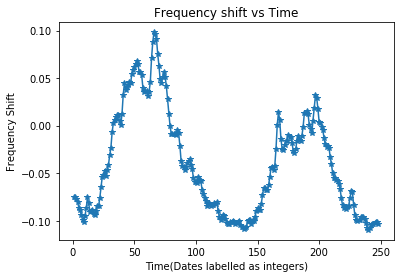

In [13]:
st.columns = st.columns.astype(int)
plt.plot(st.loc[0].values,'*',linestyle='-')
plt.title("Frequency shift vs Time")
plt.xlabel("Time(Dates labelled as integers)")
plt.ylabel("Frequency Shift")

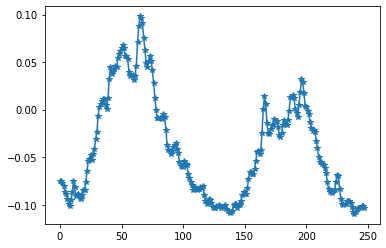

In [25]:
import plotly.graph_objects as px

In [17]:
d1 = pd.read_csv('C:/sun_api/Freq_Shift.csv',index_col=None)
d1

,Frequency shift
0,-0.075443
1,-0.075077
2,-0.077082
3,-0.080459
4,-0.086154
...,...
244,-0.102131
245,-0.101605
246,-0.101110
247,-0.103224


In [35]:
fig = px.Figure()
fig.add_trace(px.Scatter(y=d1['Frequency shift'].values,mode="lines+markers"))
fig.update_layout(title_text="shift",showlegend=True)
fig.show()